# Aufgabe A SF Permits Cleaning
Download the Building_Permits.csv from Kaggle

Clean the San Francisco Building permit dataset

Use imputation were necessary

In [1]:
#Imports
import pandas as pd
import numpy as np
import random
import copy
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest
from sklearn import svm

#seed for repoducing results
np.random.seed(0)

#Loading the Dataset
dataset = pd.read_csv("./Building_Permits.csv")

C:\Users\D073622\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Teil 1 Datenset verstehen, analysieren & cleanen

Zuerst verschaffen wir uns einen Überblick über das Datenset. Besonders achten wir im Datensatz auf:
- Daten, die eine neue Formatierung benötigen
- Ob Spalten und Zeilen "offentsichtliche" Fehler beinhalten
- Ob Werte fehlen, Spalten oder Zeilen vielleicht leer sind
- können Werte normalisiert werden

Zuerst schauen wir uns ein Sample aus dem Datenset an um einen ersten Überblick zu bekommen. Um das Sample zu verstehen arbeiten wir noch mit DataDictionaryBuildingPermit.xlsx Datei, die beim Datenset dabei ist und die Spalten erklärt. Ebenfalls ist unter https://www.kaggle.com/aparnashastry/building-permit-applications-data/ im Data Teil eine gute Ansicht, die einen schnellen Überblick gibt über das Datenset.

In [2]:
#fünf Samples aus dem Datenset
dataset.sample(5)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
40553,201403039652,8,otc alterations permit,03/03/2014,3732,008,400,NaN,Clementina,St,...,NaN,NaN,1.0,constr type 1,NaN,6.0,South of Market,94103.0,"(37.780460571778164, -122.40450626524974)",1334094491645
169731,201510159735,3,additions alterations or repairs,10/15/2015,2609,028,79,NaN,Buena Vista,Tr,...,5.0,wood frame (5),5.0,wood frame (5),NaN,8.0,Castro/Upper Market,94117.0,"(37.76757916496494, -122.43793170417105)",1399356139170
19180,M409787,8,otc alterations permit,07/22/2013,4624,031,178,NaN,West Point,Rd,...,NaN,NaN,NaN,NaN,NaN,10.0,Bayview Hunters Point,94124.0,"(37.73524725436046, -122.38063828309745)",1311685491725
68047,201411191888,8,otc alterations permit,11/19/2014,0039,109,294,NaN,Francisco,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,North Beach,94133.0,"(37.805257822817126, -122.40998545760392)",1362881288870
64238,M527228,8,otc alterations permit,10/14/2014,1251,002,707,NaN,Cole,St,...,NaN,NaN,NaN,NaN,NaN,5.0,Haight Ashbury,94117.0,"(37.76836885973765, -122.45074431487859)",135886493776


In [3]:
#Die Anzahl an fehlenden Werten pro Spalte ausgeben, sowie die Prozentzahl an gesamten fehlenden Daten
count_missing_values = dataset.isnull().sum()
print(count_missing_values.sort_values())

cells = np.product(dataset.shape)
cells_missing_values = count_missing_values.sum()

print("Percentage of Data Missing in the Dataset:", cells_missing_values / cells)

Permit Number                                  0
Filed Date                                     0
Current Status Date                            0
Current Status                                 0
Street Name                                    0
Street Number                                  0
Record ID                                      0
Block                                          0
Permit Creation Date                           0
Permit Type Definition                         0
Permit Type                                    0
Lot                                            0
Description                                  290
Location                                    1700
Zipcode                                     1716
Supervisor District                         1717
Neighborhoods - Analysis Boundaries         1725
Street Suffix                               2768
Revised Cost                                6066
Issued Date                                14940
First Construction D

In [4]:
#Testen, ob Zeilen gelöscht werden können die keine Werte enthalten
removeRows_values = dataset.dropna()
removeRows_values

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID


-> Nein, jede Zeile hat scheinbar Spalten, die keine Werte haben. Somit würden alle Zeilen gelöscht werden

In [5]:
#Testen ob Spalten gelöscht werden können, die keine Werte haben 
removeCols = dataset.dropna(axis=1)
removeCols

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Current Status,Current Status Date,Filed Date,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,expired,12/21/2017,05/06/2015,1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,issued,08/03/2017,04/19/2016,1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,withdrawn,09/26/2017,05/27/2016,1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,complete,07/24/2017,11/07/2016,1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,issued,12/01/2017,11/28/2016,144548169992
5,201706149344,8,otc alterations permit,06/14/2017,4105,009,800,Indiana,issued,07/06/2017,06/14/2017,1466911170855
6,201706300814,8,otc alterations permit,06/30/2017,1739,020,1291,11th,complete,07/12/2017,06/30/2017,1468970403692
7,M803667,8,otc alterations permit,06/30/2017,4789,014,1465,Revere,issued,06/30/2017,06/30/2017,1469035175050
8,M804227,8,otc alterations permit,07/05/2017,1212,054,2094,Fell,issued,07/05/2017,07/05/2017,1469198253772
9,M804767,8,otc alterations permit,07/06/2017,1259,016,89,Alpine,issued,07/06/2017,07/06/2017,146932394171


-> Nein, wir hätten nurnoch 12 Spalten, was eine deutliche Einschränkung des Datensatzes wäre.

Siehe oben, als wir die Anzahl fehlender Werte pro Spalte ausgegeben haben:

- Permit Number                                  0
- Filed Date                                     0
- Current Status Date                            0
- Current Status                                 0
- Street Name                                    0
- Street Number                                  0
- Record ID                                      0
- Block                                          0
- Permit Creation Date                           0
- Permit Type Definition                         0
- Permit Type                                    0
- Lot                                            0

->Zwölf Spalten

In [6]:
#See how many Columns got removed
print("Remove Columns:", removeCols.shape)
print("all Columns:", dataset.shape)

Remove Columns: (198900, 12)
all Columns: (198900, 43)


Nun schauen wir uns die einzelnen Einträge der Spalten genauer an. Dadurch, dass manche Spalten viele unterschiedliche Werte haben, liefert unique() viele Einzelwerte. Auch diese liefern uns wichtige Erkenntnisse, die fürs Cleaning relevant sind. Z.B. Lohnt es sich in solchen Spalten die Werte auszufüllen wenn der Eintrag in jeder Zeile unterschiedlich ist? ->Nein

In [7]:
for name, values in dataset.items():
    print(name, " hat die Einzelwerte: ", dataset[name].unique())
    print("-----------------")

Permit Number  hat die Einzelwerte:  ['201505065519' '201604195146' '201605278609' ... 'M863507' 'M863747'
 'M864287']
-----------------
Permit Type  hat die Einzelwerte:  [4 3 8 6 7 1 5 2]
-----------------
Permit Type Definition  hat die Einzelwerte:  ['sign - erect' 'additions alterations or repairs'
 'otc alterations permit' 'demolitions' 'wall or painted sign'
 'new construction' 'grade or quarry or fill or excavate'
 'new construction wood frame']
-----------------
Permit Creation Date  hat die Einzelwerte:  ['05/06/2015' '04/19/2016' '05/27/2016' ... '02/21/2018' '02/22/2018'
 '02/23/2018']
-----------------
Block  hat die Einzelwerte:  ['0326' '0306' '0595' ... '2601' '8725' '4976']
-----------------
Lot  hat die Einzelwerte:  ['023' '007' '203' ... '024K' '008I' '632']
-----------------
Street Number  hat die Einzelwerte:  [ 140  440 1647 ... 3886 4169 5080]
-----------------
Street Number Suffix  hat die Einzelwerte:  [nan 'A' 'C' 'V' 'B' 'F' 'R' 'D' '0' 'E' 'P' 'G' 'J' 'K' '

First Construction Document Date  hat die Einzelwerte:  ['11/09/2015' '08/03/2017' nan ... '02/02/2018' '02/05/2018' '01/29/2018']
-----------------
Structural Notification  hat die Einzelwerte:  [nan 'Y']
-----------------
Number of Existing Stories  hat die Einzelwerte:  [ 6.   7.   2.   3.   5.   nan  4.   1.  15.  23.  11.  13.  22.  21.
 17.  16.  26.   8.   9.  34.  20.  24.  48.  25.  19.  12.  14.  30.
 53.  52.  18.  37.  38.  31.  36.  32.  39.  40.  10.  43.  33.  50.
  0.  55.  42.  60.  58.  29.  35.  45.  28.  63.  27.  41.  47.  46.
 61.  44.  49.  54.  78.   2.5  1.5 62.  56. ]
-----------------
Number of Proposed Stories  hat die Einzelwerte:  [ nan  6.   2.   5.   3.   4.   1.  23.  13.  22.  21.  17.  16.   8.
 15.   9.   7.  26.  34.  20.  24.  48.  11.  25.  19.  12.  14.  30.
 53.  52.  18.  37.  38.  31.  36.  32.  39.  40.  10.  43.  33.  50.
 55.  42.  60.  58.  29.  35.  45.   0.  28.  63.  27.  62.  41.  47.
 46.  54.  61.  44.  49.  78.  56.   2.5  1.5]
----

Record ID  hat die Einzelwerte:  [1380611233945 1420164406718 1424856504716 ... 1489539379952 1489608233656
 1489796283803]
-----------------


## Erste Schlussfolgerung

Site Permit, Voluntary Soft-Story Retrofit und Fire Only Permit enthalten nur Y und nan Werte. Nan Werte entsprechen hier der "0" während Y der "1" entspricht. Nach weiterer Überprüfung der Bedeutung der Spalte und Ansicht der Spalten füllen wir die Spalten auf. 

Wenn kein "Y" in der Zelle steht füllen wir sie mit N, ansonsten bleibt "Y" in der Zelle.

In [8]:
dataset["Site Permit"] = np.where(dataset["Site Permit"] != "Y", "N", "Y")
dataset["Voluntary Soft-Story Retrofit"] = np.where(dataset["Voluntary Soft-Story Retrofit"] != "Y", "N", "Y")
dataset["Fire Only Permit"] = np.where(dataset["Fire Only Permit"] != "Y", "N", "Y")

#Test, hat das auffüllen geklappt
dataset["Fire Only Permit"].value_counts()

N    180073
Y     18827
Name: Fire Only Permit, dtype: int64

## Nächste Schlussfolgerung

Nachdem wir das Datenset verstanden und analysiert haben sind wir zu folgendem Schluss gekommen:
- Permit Number wird nicht weiter benötigt, da es sich um eine Nummer handelt mit zu vielen Kategorien
- Record Id wird nicht weiter benötigt, da die Spalte keine Aussagekraft für uns hat: "Some ID, not useful for this" steht in der Beschreibung
- Definitionen und Descriptions können ebenfalls gelöscht werden, da hierfür numerische Werte vorhanden sind oder Texte uns in unserem ML Fall nicht weiterbingen 

In [9]:
droped_dataset = copy.copy(dataset)
droped_dataset.drop("Permit Number", axis=1, inplace=True)
droped_dataset.drop("Record ID", axis=1, inplace=True)
droped_dataset.drop("Permit Type Definition", axis=1, inplace=True)
droped_dataset.drop("Existing Construction Type Description", axis=1, inplace=True)
droped_dataset.drop("Proposed Construction Type Description", axis=1, inplace=True)
droped_dataset.drop("Description", axis=1, inplace=True)

In [10]:
#Test, wie viele Spalten wurden entfernt
print("Droped Columns Dataset:", droped_dataset.shape)
print("All Columns Dataset:", dataset.shape)

Droped Columns Dataset: (198900, 37)
All Columns Dataset: (198900, 43)


## Nächste Schlussfolgerung

Als nächstes werden alle Spalten entfernt, denen mehr als 50% der Daten fehlt. Dadurch, dass wir in Site Permit, Voluntary Soft-Story Retrofit und Fire Only Permit zuvor nan mit "N" ersetzt haben, verlieren wir diese Spalten nicht. 

In [11]:
count_droped_missing_values = droped_dataset.isnull().sum() / len(droped_dataset)
count_droped_missing_values= count_droped_missing_values.sort_values()
for desc, per in count_droped_missing_values.items():
    if per > 0.50:
        print("gelöschte spalte:", desc)
        droped_dataset.drop(desc, axis=1, inplace=True)
droped_dataset.head()

gelöschte spalte: Completed Date
gelöschte spalte: Unit
gelöschte spalte: Structural Notification
gelöschte spalte: Street Number Suffix
gelöschte spalte: Unit Suffix
gelöschte spalte: TIDF Compliance


,Permit Type,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Current Status,Current Status Date,Filed Date,...,Proposed Use,Proposed Units,Plansets,Existing Construction Type,Proposed Construction Type,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location
0,4,05/06/2015,0326,023,140,Ellis,St,expired,12/21/2017,05/06/2015,...,NaN,NaN,2.0,3.0,NaN,N,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)"
1,4,04/19/2016,0306,007,440,Geary,St,issued,08/03/2017,04/19/2016,...,NaN,NaN,2.0,3.0,NaN,N,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)"
2,3,05/27/2016,0595,203,1647,Pacific,Av,withdrawn,09/26/2017,05/27/2016,...,retail sales,39.0,2.0,1.0,1.0,N,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)"
3,8,11/07/2016,0156,011,1230,Pacific,Av,complete,07/24/2017,11/07/2016,...,1 family dwelling,1.0,2.0,5.0,5.0,N,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)"
4,6,11/28/2016,0342,001,950,Market,St,issued,12/01/2017,11/28/2016,...,NaN,NaN,2.0,3.0,NaN,N,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)"


In [12]:
#Test, wie viele Spalten entfernt wurden
print("Droped Columns Dataset:", droped_dataset.shape)
print("All Columns Dataset:", dataset.shape)

Droped Columns Dataset: (198900, 31)
All Columns Dataset: (198900, 43)


In [13]:
count_droped_missing_values = droped_dataset.isnull().sum()
print(count_droped_missing_values.sort_values())

cells = np.product(droped_dataset.shape)
cells_droped_missing_values = count_droped_missing_values.sum()

print("Percentage of Data Missing in the Dataset:", cells_droped_missing_values / cells)

Permit Type                                0
Site Permit                                0
Voluntary Soft-Story Retrofit              0
Filed Date                                 0
Current Status Date                        0
Current Status                             0
Fire Only Permit                           0
Street Name                                0
Street Number                              0
Lot                                        0
Permit Creation Date                       0
Block                                      0
Location                                1700
Zipcode                                 1716
Supervisor District                     1717
Neighborhoods - Analysis Boundaries     1725
Street Suffix                           2768
Revised Cost                            6066
Issued Date                            14940
First Construction Document Date       14946
Plansets                               37309
Estimated Cost                         38066
Existing U

In [14]:
droped_dataset["Street Name"].value_counts()

Market               5443
California           4587
Mission              4209
Montgomery           2403
Geary                1966
20th                 1859
03rd                 1819
Folsom               1776
Pine                 1677
Sacramento           1630
Post                 1568
Jackson              1552
Union                1462
17th                 1458
Pacific              1449
18th                 1445
Green                1423
Bush                 1402
19th                 1397
24th                 1361
Sutter               1342
16th                 1310
Broadway             1278
Clay                 1274
Vallejo              1244
21st                 1234
Washington           1214
02nd                 1208
15th                 1170
22nd                 1153
                     ... 
East Crystal Cove       1
Danton                  1
Doric                   1
Reno                    1
Ames                    1
Adele                   1
Jose Sarria             1
Penny       

## Nächste Schlussfolgerung

Es gibt im Datenset mehrere Möglichkeiten Orte zu identifizieren. Für uns sind einige davon zu genau oder nicht relevant. Z.B. Location enthält die genauen Geo Coordinaten, die ohne Klassifizierung in Geozonen schwer / nicht verwendbar sind. Street Suffix hat keine Bedeutung, genauso wie Block und Lot, die ebenfalls keinen Einfluss auf Baugenehmigungen haben sollten.

Street Name, Zipcode, District und Neighborhoods werden für die Lokation verwendet

In [15]:
#Street Name, Zipcode, District und Neighborhoods werden für die Lokation verwendet
#alle anderen sind haben zu viele Werte und können schwer kategorisiert werden
droped_dataset.drop("Street Number", axis=1, inplace=True)
droped_dataset.drop("Block", axis=1, inplace=True)
droped_dataset.drop("Lot", axis=1, inplace=True)
droped_dataset.drop("Street Suffix", axis=1, inplace=True)
droped_dataset.drop("Location", axis=1, inplace=True)

In [16]:
#Test, wie viele Spalten entfernt wurden
print("Droped Columns Dataset:", droped_dataset.shape)
print("All Columns Dataset:", dataset.shape)

Droped Columns Dataset: (198900, 26)
All Columns Dataset: (198900, 43)


## Nächste Schlussfolgerung

Wir haben die Übereinstimmung der proposed und existing Spalten getestet um das Datenset weiter aufzuräumen. Da meist eine relativ hohe Übereinstimmung vorliegt, führen wir die Spalten in der Existing Spalte zusammen. Diese scheint die relevantere von beiden zu sein.

In [17]:
def check_e_p(column_e, column_p):
    print("======= Spalten ", column_e, " und ", column_p, " =========")
    #Zusammenhang zwischen verschiedenen Spalten prüfen
    true_false = droped_dataset[column_e] == droped_dataset[column_p]
    print(true_false.value_counts())
    print("before: ", true_false.sum() / len(droped_dataset[column_p]))
    print("-------------------------------------------------------")

    #wegen hoher Übereinstimmung mit Werten auffüllen
    droped_dataset[column_e].fillna(droped_dataset[column_p], inplace=True)

    #Zusammenhang zwischen verschiedenen Spalten prüfen
    true_false = droped_dataset[column_e] == droped_dataset[column_p]
    print(true_false.value_counts())
    print("-------------------------------------------------------")
    print("after: ", true_false.sum() / len(droped_dataset[column_p]))

    #Revised Cost hat die neuen und damit auch "genaueren" Daten, dazu fehlen hier weniger Daten
    droped_dataset.drop(column_p, axis=1, inplace=True)

In [18]:
check_e_p("Revised Cost", "Estimated Cost")
check_e_p("Existing Use", "Proposed Use")
check_e_p("Existing Units","Proposed Units")
check_e_p("Number of Existing Stories", "Number of Proposed Stories")
check_e_p("Existing Construction Type", "Proposed Construction Type")

======= Spalten  Revised Cost  und  Estimated Cost  =========
True     111500
False     87400
dtype: int64
before:  0.5605832076420312
-------------------------------------------------------
True     116961
False     81939
dtype: int64
-------------------------------------------------------
after:  0.5880392156862745
======= Spalten  Existing Use  und  Proposed Use  =========
True     147643
False     51257
dtype: int64
before:  0.7422976370035194
-------------------------------------------------------
True     149953
False     48947
dtype: int64
-------------------------------------------------------
after:  0.753911513323278
======= Spalten  Existing Units  und  Proposed Units  =========
True     140628
False     58272
dtype: int64
before:  0.7070286576168929
-------------------------------------------------------
True     143643
False     55257
dtype: int64
-------------------------------------------------------
after:  0.7221870286576169
======= Spalten  Number of Existing Stories 

## Nächste Schlussfolgerung

Wir spalten nun die Datumsspalten auf, da es sonst schwer wird mit dem Datum zu arbeiten. Danach löschen wir die "alten" Datumsspalten.

In [19]:
import datetime

def dateformat(column):
    year_array = []
    month_array = []
    day_array = []
    for date in droped_dataset[column]:
        date_str = str(date)
        if date_str != "nan":
            date_obj = datetime.datetime.strptime(date_str, "%m/%d/%Y")
            year_array.append(pd.to_numeric(str(date_obj.year)))
            month_array.append(pd.to_numeric(str(date_obj.month)))
            day_array.append(pd.to_numeric(str(date_obj.day)))
        else:
            year_array.append(np.nan)
            month_array.append(np.nan)
            day_array.append(np.nan)
    droped_dataset[column+' Year'] = pd.Series(year_array)    
    droped_dataset[column+' Month'] = pd.Series(month_array)    
    droped_dataset[column+' Day'] = pd.Series(day_array)   
    print("done", column)

In [20]:
dateformat("Permit Expiration Date")
dateformat("Permit Creation Date")
dateformat("Current Status Date")
dateformat("Filed Date")
dateformat("Issued Date")
dateformat("First Construction Document Date")

done Permit Expiration Date
done Permit Creation Date
done Current Status Date
done Filed Date
done Issued Date
done First Construction Document Date


In [21]:
droped_dataset.drop("Permit Expiration Date", axis=1, inplace=True)
droped_dataset.drop("Permit Creation Date", axis=1, inplace=True)
droped_dataset.drop("Current Status Date", axis=1, inplace=True)
droped_dataset.drop("Filed Date", axis=1, inplace=True)
droped_dataset.drop("Issued Date", axis=1, inplace=True)
droped_dataset.drop("First Construction Document Date", axis=1, inplace=True)

In [22]:
#Test, wie viele Spalten entfernt wurden
print("Droped Columns Dataset:", droped_dataset.shape)
print("All Columns Dataset:", dataset.shape)

Droped Columns Dataset: (198900, 33)
All Columns Dataset: (198900, 43)


In [23]:
count_droped_missing_values = droped_dataset.isnull().sum() / 198900
print(count_droped_missing_values.sort_values())

cells = np.product(droped_dataset.shape)
cells_droped_missing_values = count_droped_missing_values.sum()

print("Percentage of Data Missing in the Dataset:", cells_droped_missing_values / cells)

Permit Type                               0.000000
Permit Creation Date Day                  0.000000
Permit Creation Date Month                0.000000
Permit Creation Date Year                 0.000000
Current Status Date Day                   0.000000
Filed Date Year                           0.000000
Filed Date Month                          0.000000
Current Status Date Year                  0.000000
Filed Date Day                            0.000000
Site Permit                               0.000000
Fire Only Permit                          0.000000
Voluntary Soft-Story Retrofit             0.000000
Current Status                            0.000000
Street Name                               0.000000
Current Status Date Month                 0.000000
Revised Cost                              0.003042
Zipcode                                   0.008627
Supervisor District                       0.008632
Neighborhoods - Analysis Boundaries       0.008673
Issued Date Month              

# Teil 2 Imputation

1. dropping column, row
2. Imputation: mean / median
3. Imputation: mean / median + missing column

Wir füllen nun unsere Zellen mit Werten um unser Datenset zu vervollständigen.
- median einer Gruppe oder allen Einträgen
- Durchschnitt bei Ausreisserdaten gefährlich

Um im nachhinein einen Überblick zu haben welche Zellen imputiert wurden, erstellen wir weitere Spalten die uns sagen, ob eine Zelle imputiert wurde oder  nicht.

In [24]:
imputed_dataset = droped_dataset.copy()

cols_with_missing = (col for col in droped_dataset.columns 
                                 if droped_dataset[col].isnull().any())
for col in cols_with_missing:
    imputed_dataset[col + '_was_missing'] = imputed_dataset[col].isnull()

imputed_dataset.head()

,Permit Type,Street Name,Current Status,Number of Existing Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Revised Cost,Existing Use,Existing Units,Plansets,...,Zipcode_was_missing,Permit Expiration Date Year_was_missing,Permit Expiration Date Month_was_missing,Permit Expiration Date Day_was_missing,Issued Date Year_was_missing,Issued Date Month_was_missing,Issued Date Day_was_missing,First Construction Document Date Year_was_missing,First Construction Document Date Month_was_missing,First Construction Document Date Day_was_missing
0,4,Ellis,expired,6.0,N,N,4000.0,tourist hotel/motel,143.0,2.0,...,False,False,False,False,False,False,False,False,False,False
1,4,Geary,issued,7.0,N,N,500.0,tourist hotel/motel,NaN,2.0,...,False,False,False,False,False,False,False,False,False,False
2,3,Pacific,withdrawn,6.0,N,N,20000.0,retail sales,39.0,2.0,...,False,True,True,True,True,True,True,True,True,True
3,8,Pacific,complete,2.0,N,N,2000.0,1 family dwelling,1.0,2.0,...,False,False,False,False,False,False,False,False,False,False
4,6,Market,issued,3.0,N,N,100000.0,retail sales,NaN,2.0,...,False,False,False,False,False,False,False,False,False,False


Wir bilden nun den Mittelwert unserer Spalten, die numerische Werte enthalten. Der Mittelwert ist nur auf diese Spalten anwendbar. 

Spalten wie Zipcode enthalten ebenfalls numerische Werte, hier ist der Einsatz vom Mittelwert nicht sinnvoll, weswegen wir für jede einzelne numerische Spalte die Entscheidung treffen ob Mittelwert oder nicht.

In [25]:
#Spalten, für die Mittelwert sinnvoll anwendbar ist
numbers = ["Number of Existing Stories", "Revised Cost", "Existing Units"]

for column in numbers:
    print(column, " before: ", imputed_dataset[column].isnull().sum())
    imputed_dataset[column].fillna(imputed_dataset[column].mean(skipna=True), inplace=True)
    print(column, " after: ", imputed_dataset[column].isnull().sum())
    print("_________________________________________")

Number of Existing Stories  before:  39374
Number of Existing Stories  after:  0
_________________________________________
Revised Cost  before:  605
Revised Cost  after:  0
_________________________________________
Existing Units  before:  48523
Existing Units  after:  0
_________________________________________


Alle kategorischen Daten werden mit dem häufigsten Wert aufgefüllt. Man muss beachten, dass in einigen Spalten viele Daten imputiert werden. (Transparent durch "_was_missing" Spalten)


Auch Datumsfelder werden aufgefüllt um keine Werte in Spalten zu verlieren, die vielleicht noch relevant werden. Wenn wir dies nicht tun verlieren wir ca 26% unserer Daten, da in "Permit Expiration Date Year" noch 26% an Daten fehlen und dropna() all diese Zeilen löscht. Da die Möglichkeit besteht, dass wir wichtige Daten in anderen Spalten dadurch verlieren imputen wir einfachheitshalber ebenfalls die Datumsfelder.

Der wahre Grund warum diese Zellen fehlen ist, dass manche Anträge von der Behörde noch nicht fertig bearbeitet sind und somit nicht alle Felder ausgefüllt wurden.

### Beweis, 26% würden gelöscht werden

In [26]:
#Alle Zeilen entfernen, die teils keine Werte enthalten
############
# Dieser Codeblock ist für den weiteren verlauf nicht weiter relevant
###########
#imputed_dataset.drop("Completed Date", axis=1, inplace=True)
removeRows_values = imputed_dataset.dropna()
removeRows_values

,Permit Type,Street Name,Current Status,Number of Existing Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Revised Cost,Existing Use,Existing Units,Plansets,...,Zipcode_was_missing,Permit Expiration Date Year_was_missing,Permit Expiration Date Month_was_missing,Permit Expiration Date Day_was_missing,Issued Date Year_was_missing,Issued Date Month_was_missing,Issued Date Day_was_missing,First Construction Document Date Year_was_missing,First Construction Document Date Month_was_missing,First Construction Document Date Day_was_missing
0,4,Ellis,expired,6.0,N,N,4000.00,tourist hotel/motel,143.000000,2.0,...,False,False,False,False,False,False,False,False,False,False
1,4,Geary,issued,7.0,N,N,500.00,tourist hotel/motel,16.350162,2.0,...,False,False,False,False,False,False,False,False,False,False
3,8,Pacific,complete,2.0,N,N,2000.00,1 family dwelling,1.000000,2.0,...,False,False,False,False,False,False,False,False,False,False
4,6,Market,issued,3.0,N,N,100000.00,retail sales,16.350162,2.0,...,False,False,False,False,False,False,False,False,False,False
5,8,Indiana,issued,5.0,N,Y,4000.00,apartments,326.000000,2.0,...,False,False,False,False,False,False,False,False,False,False
6,8,11th,complete,3.0,N,N,12000.00,apartments,5.000000,0.0,...,False,False,False,False,False,False,False,False,False,False
24,8,Charlton,issued,4.0,N,N,64650.00,apartments,9.000000,0.0,...,False,False,False,False,False,False,False,False,False,False
25,8,29th,issued,2.0,N,N,7000.00,1 family dwelling,1.000000,0.0,...,False,False,False,False,False,False,False,False,False,False
48,8,Felton,complete,2.0,N,N,14000.00,1 family dwelling,1.000000,0.0,...,False,False,False,False,False,False,False,False,False,False
68,8,06th,issued,2.0,N,N,6000.00,apartments,3.000000,0.0,...,False,False,False,False,False,False,False,False,False,False


In [27]:
#Alle restlichen Felder imputen
for column in imputed_dataset.columns:
    if (imputed_dataset[column].isnull().sum() == 0):
        continue
    imputed_dataset[column].fillna(imputed_dataset[column].mode()[0], inplace=True)

In [28]:
count_droped_missing_values = imputed_dataset.isnull().sum() / 198900
print(count_droped_missing_values.sort_values())

cells = np.product(imputed_dataset.shape)
cells_droped_missing_values = count_droped_missing_values.sum()

print("Percentage of Data Missing in the Dataset:", cells_droped_missing_values / cells)

Permit Type                                           0.0
Issued Date Year                                      0.0
Issued Date Month                                     0.0
Issued Date Day                                       0.0
First Construction Document Date Year                 0.0
First Construction Document Date Month                0.0
First Construction Document Date Day                  0.0
Number of Existing Stories_was_missing                0.0
Revised Cost_was_missing                              0.0
Existing Use_was_missing                              0.0
Existing Units_was_missing                            0.0
Filed Date Day                                        0.0
Plansets_was_missing                                  0.0
Supervisor District_was_missing                       0.0
Neighborhoods - Analysis Boundaries_was_missing       0.0
Zipcode_was_missing                                   0.0
Permit Expiration Date Year_was_missing               0.0
Permit Expirat

# Aufgabe B SF Permits Exploration

- Explore the data. Which columns correlate strongly with the "Current Status" column? How do other columns correlate to each other?

- Describe problems with "Current Status" as a target column to predict. Can you construct a better
target column?

### reinigen (1)
Das Imputed Datenset von den "was_missing" Spalten bereinigen, um eine bessere Aussagekraft für Graphen zu bekommen.

In [29]:
imputed_w_m_dataset = imputed_dataset.copy()

for column in imputed_w_m_dataset.columns:
    if("_was_missing" in column):
        imputed_w_m_dataset = imputed_w_m_dataset.drop(column, axis=1)

#Test, wie viele Spalten entfernt wurden
print("Droped Columns Dataset:", imputed_w_m_dataset.shape)
print("All Columns Dataset:", imputed_dataset.shape)

Droped Columns Dataset: (198900, 33)
All Columns Dataset: (198900, 51)


Methoden, die wir später zur Veranschaulichung der Daten nutzen:

In [30]:
#Modifizierte Heatmap (wird später erklärt)
def heatmap(x, y, **kwargs):
    if 'color' in kwargs:
        color = kwargs['color']
    else:
        color = [1]*len(x)

    if 'palette' in kwargs:
        palette = kwargs['palette']
        n_colors = len(palette)
    else:
        n_colors = 256 # Use 256 colors for the diverging color palette
        palette = sns.color_palette("Blues", n_colors) 

    if 'color_range' in kwargs:
        color_min, color_max = kwargs['color_range']
    else:
        color_min, color_max = min(color), max(color) # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        if color_min == color_max:
            return palette[-1]
        else:
            val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            ind = int(val_position * (n_colors - 1)) # target index in the color palette
            return palette[ind]

    if 'size' in kwargs:
        size = kwargs['size']
    else:
        size = [1]*len(x)

    if 'size_range' in kwargs:
        size_min, size_max = kwargs['size_range'][0], kwargs['size_range'][1]
    else:
        size_min, size_max = min(size), max(size)

    size_scale = kwargs.get('size_scale', 500)

    def value_to_size(val):
        if size_min == size_max:
            return 1 * size_scale
        else:
            val_position = (val - size_min) * 0.99 / (size_max - size_min) + 0.01 # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            return val_position * size_scale
    if 'x_order' in kwargs: 
        x_names = [t for t in kwargs['x_order']]
    else:
        x_names = [t for t in sorted(set([v for v in x]))]
    x_to_num = {p[1]:p[0] for p in enumerate(x_names)}

    if 'y_order' in kwargs: 
        y_names = [t for t in kwargs['y_order']]
    else:
        y_names = [t for t in sorted(set([v for v in y]))]
    y_to_num = {p[1]:p[0] for p in enumerate(y_names)}

    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x10 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the left 14/15ths of the grid for the main plot

    marker = kwargs.get('marker', 's')

    kwargs_pass_on = {k:v for k,v in kwargs.items() if k not in [
         'color', 'palette', 'color_range', 'size', 'size_range', 'size_scale', 'marker', 'x_order', 'y_order'
    ]}

    ax.scatter(
        x=[x_to_num[v] for v in x],
        y=[y_to_num[v] for v in y],
        marker=marker,
        s=[value_to_size(v) for v in size], 
        c=[value_to_color(v) for v in color],
        **kwargs_pass_on
    )
    ax.set_xticks([v for k,v in x_to_num.items()])
    ax.set_xticklabels([k for k in x_to_num], rotation=45, horizontalalignment='right')
    ax.set_yticks([v for k,v in y_to_num.items()])
    ax.set_yticklabels([k for k in y_to_num])

    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5])
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.set_facecolor('#F1F1F1')

    # Add color legend on the right side of the plot
    if color_min < color_max:
        ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

        col_x = [0]*len(palette) # Fixed x coordinate for the bars
        bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

        bar_height = bar_y[1] - bar_y[0]
        ax.barh(
            y=bar_y,
            width=[5]*len(palette), # Make bars 5 units wide
            left=col_x, # Make bars start at 0
            height=bar_height,
            color=palette,
            linewidth=0
        )
        ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
        ax.grid(False) # Hide grid
        ax.set_facecolor('white') # Make background white
        ax.set_xticks([]) # Remove horizontal ticks
        ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
        ax.yaxis.tick_right() # Show vertical ticks on the right

def corrplot(data, size_scale=500, marker='s'):
    corr = pd.melt(data.reset_index(), id_vars='index')
    corr.columns = ['x', 'y', 'value']
    print(corr.columns)
    heatmap(
        corr['x'], corr['y'],
        color=corr['value'], color_range=[-1, 1],
        palette=sns.diverging_palette(20, 220, n=256),
        size=corr['value'].abs(), size_range=[0,1],
        marker=marker,
        x_order=data.columns,
        y_order=data.columns[::-1],
        size_scale=size_scale
    )

In [31]:
sns.set(style="whitegrid", color_codes=True)
def barplots(column, column_2):
    plt.figure(figsize=(25,10))
    sns.barplot(column, column_2, data=imputed_w_m_dataset)
    plt.show()

In [32]:
def kdeplot(column):
    plt.figure(figsize=(20,5))
    sns.kdeplot(imputed_w_m_dataset[column][imputed_w_m_dataset['Current Status'] == 1], color="Lightgreen", shade=True)
    sns.kdeplot(imputed_w_m_dataset[column][imputed_w_m_dataset['Current Status'] == 0], color="lightcoral", shade=True)
    plt.xlabel(column)
    plt.ylabel("Current Status")
    plt.legend(['permitted', 'not permitted'])
    plt.show()

### Current Status umbauen


In [33]:
print(imputed_w_m_dataset["Current Status"].unique())
print("-------------------------------------")
print(imputed_w_m_dataset["Current Status"].value_counts())
print("-------------------------------------")
print(imputed_w_m_dataset["Current Status"])

['expired' 'issued' 'withdrawn' 'complete' 'filed' 'approved' 'reinstated'
 'cancelled' 'appeal' 'suspend' 'revoked' 'plancheck' 'disapproved'
 'incomplete']
-------------------------------------
complete       97077
issued         83559
filed          12043
withdrawn       1754
cancelled       1536
expired         1370
approved         733
reinstated       563
suspend          193
revoked           50
plancheck         16
disapproved        2
incomplete         2
appeal             2
Name: Current Status, dtype: int64
-------------------------------------
0           expired
1            issued
2         withdrawn
3          complete
4            issued
5            issued
6          complete
7            issued
8            issued
9            issued
10           issued
11           issued
12           issued
13            filed
14           issued
15           issued
16           issued
17           issued
18            filed
19           issued
20           issued
21            fil

Current Status wird zur Vereinfachung in zwei Gruppen eingeteilt. In permitted und non_permitted.

In [34]:
def groupstatus(value, columns):
    for column in columns:
        print("Replace ", column, "with Value ", value)
        imputed_w_m_dataset["Current Status"].replace(to_replace=column, value=value, inplace=True)

In [35]:
permitted = ['approved', 'issued', 'complete']
non_permitted = ['expired', 'withdrawn', 'filed', 'reinstated',
                 'cancelled', 'appeal', 'suspend', 'revoked', 
                 'plancheck', 'disapproved',
                 'incomplete']
groupstatus(1, permitted)
groupstatus(0, non_permitted)
imputed_w_m_dataset["Current Status"] = pd.to_numeric(imputed_w_m_dataset["Current Status"])
print("---------------------")
print(imputed_w_m_dataset["Current Status"].value_counts())

Replace  approved with Value  1
Replace  issued with Value  1
Replace  complete with Value  1
Replace  expired with Value  0
Replace  withdrawn with Value  0
Replace  filed with Value  0
Replace  reinstated with Value  0
Replace  cancelled with Value  0
Replace  appeal with Value  0
Replace  suspend with Value  0
Replace  revoked with Value  0
Replace  plancheck with Value  0
Replace  disapproved with Value  0
Replace  incomplete with Value  0
---------------------
1    181369
0     17531
Name: Current Status, dtype: int64


# Exploration und Correlation

Um einen Überblick zu bekommen schauen wir uns die Korrelation des gesamten Datensatzes nun an, sowie die Korrelation zwischen Current Status und den anderen Spalten. Hierfür nutzen wir einmal eine modifizierte Heatmap sowie Plotting.

In [36]:
imputed_w_m_dataset.corr(method ='pearson')

,Permit Type,Current Status,Number of Existing Stories,Revised Cost,Existing Units,Plansets,Existing Construction Type,Supervisor District,Zipcode,Permit Expiration Date Year,...,Current Status Date Day,Filed Date Year,Filed Date Month,Filed Date Day,Issued Date Year,Issued Date Month,Issued Date Day,First Construction Document Date Year,First Construction Document Date Month,First Construction Document Date Day
Permit Type,1.000000,0.265189,0.052029,-0.122787,-0.014322,-0.009129,0.039756,-0.050080,-0.012993,-0.153654,...,-0.005615,0.004846,-0.004833,-0.009669,-0.129029,-0.098796,0.077173,-0.138609,-0.105748,0.083001
Current Status,0.265189,1.000000,0.046735,-0.018357,0.007452,-0.005025,-0.017766,-0.014969,-0.006923,-0.167861,...,-0.003398,-0.099660,-0.012249,-0.001744,-0.258903,-0.240971,0.205161,-0.258310,-0.239391,0.204488
Number of Existing Stories,0.052029,0.046735,1.000000,0.047832,0.275707,0.009438,-0.651489,-0.149538,-0.305408,0.056461,...,-0.001432,0.017363,0.002858,0.003855,0.004979,-0.010386,0.010740,0.004053,-0.011603,0.011550
Revised Cost,-0.122787,-0.018357,0.047832,1.000000,0.055743,0.001176,-0.056918,0.009844,-0.007546,0.071954,...,0.003873,-0.002370,0.010455,0.006772,0.015618,0.012937,-0.005376,0.019425,0.012746,-0.005642
Existing Units,-0.014322,0.007452,0.275707,0.055743,1.000000,0.001507,-0.253185,-0.037681,-0.116816,0.025410,...,0.000223,0.013190,-0.000862,0.001129,0.013870,-0.001540,-0.000798,0.013654,-0.001427,-0.000521
Plansets,-0.009129,-0.005025,0.009438,0.001176,0.001507,1.000000,-0.009363,0.000388,-0.004550,0.013296,...,0.000240,0.001930,0.001128,0.000053,0.004294,0.002810,-0.001113,0.004375,0.002950,-0.001201
Existing Construction Type,0.039756,-0.017766,-0.651489,-0.056918,-0.253185,-0.009363,1.000000,0.112190,0.337339,0.042748,...,-0.005923,0.014645,0.006240,-0.008985,0.009072,0.007932,-0.008814,0.009973,0.009075,-0.009856
Supervisor District,-0.050080,-0.014969,-0.149538,0.009844,-0.037681,0.000388,0.112190,1.000000,-0.065339,-0.022896,...,0.001641,-0.002376,-0.002758,-0.004455,0.005205,0.002800,-0.003041,0.006097,0.005457,-0.005793
Zipcode,-0.012993,-0.006923,-0.305408,-0.007546,-0.116816,-0.004550,0.337339,-0.065339,1.000000,-0.019690,...,-0.002078,0.006928,0.002948,-0.005711,0.002505,0.001082,-0.002215,0.003274,0.001171,-0.001661
Permit Expiration Date Year,-0.153654,-0.167861,0.056461,0.071954,0.025410,0.013296,0.042748,-0.022896,-0.019690,1.000000,...,-0.001479,0.691189,-0.000774,0.000102,0.756140,0.022025,-0.053688,0.757822,0.028043,-0.056854


Index(['x', 'y', 'value'], dtype='object')


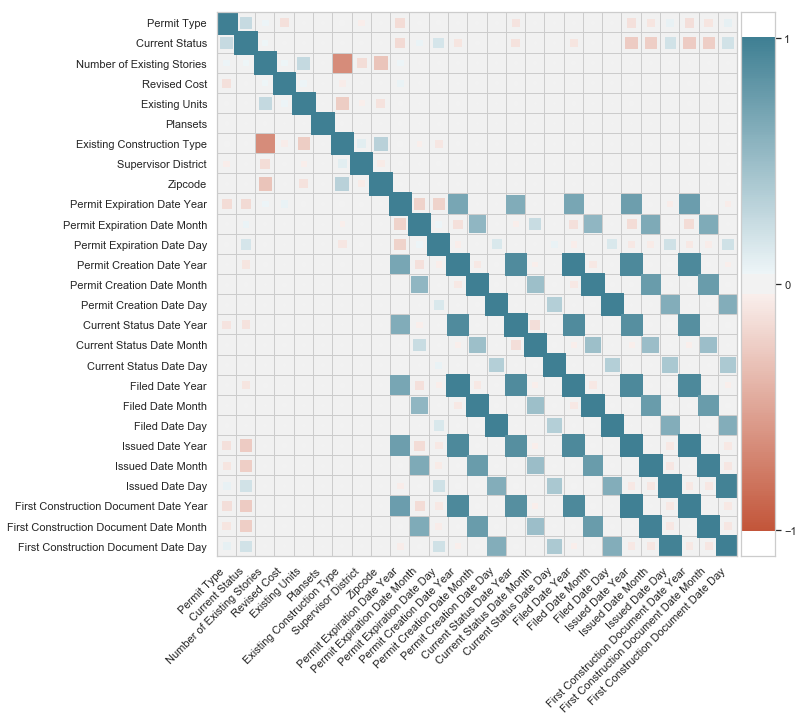

In [37]:
plt.figure(figsize=(10, 10))
corrplot(imputed_w_m_dataset.corr())

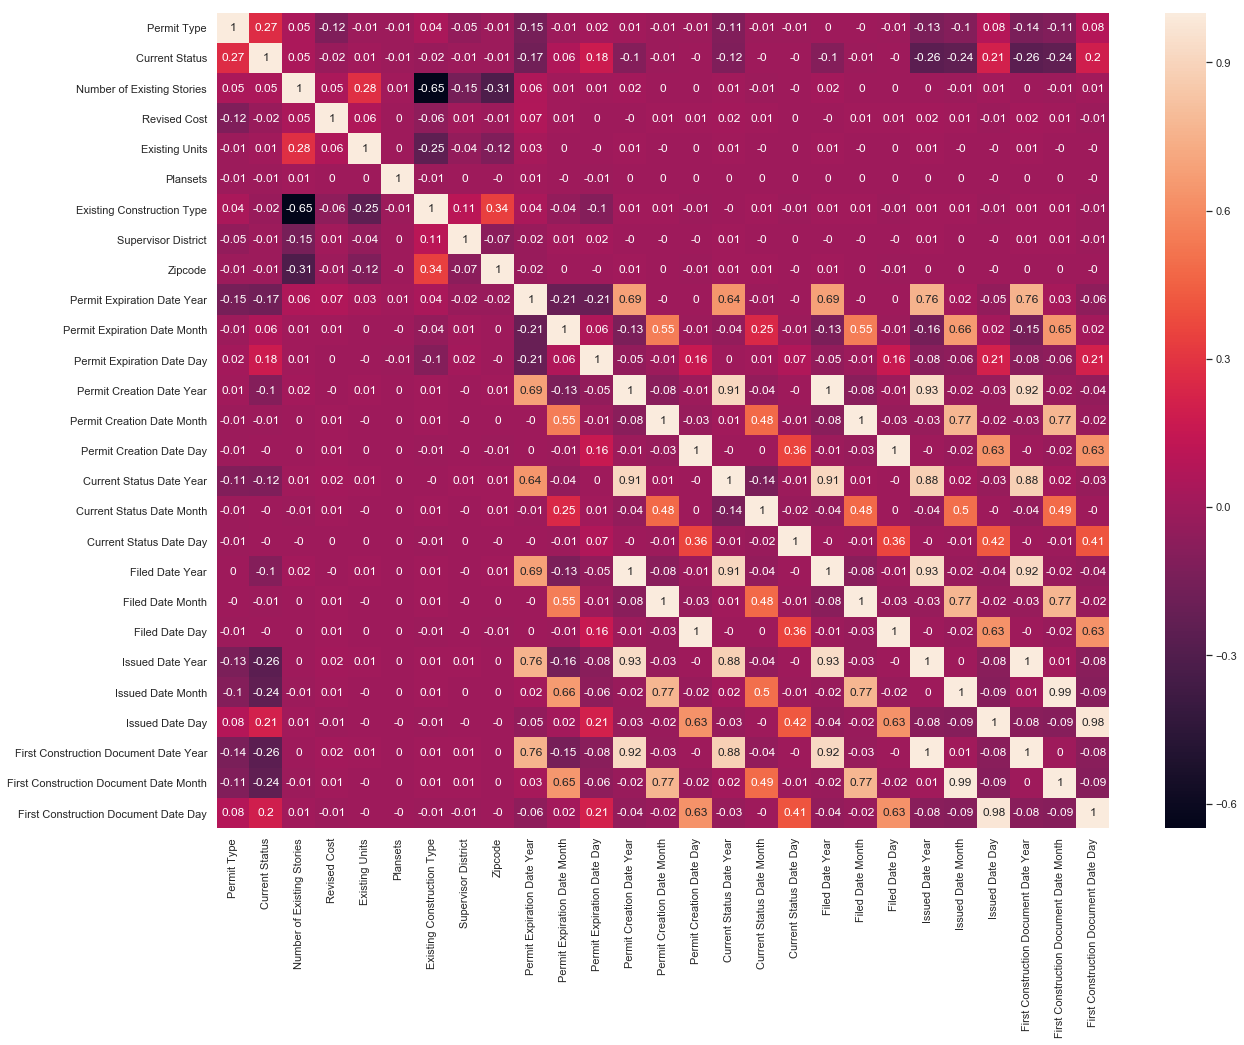

In [38]:
correlation_matrix = imputed_w_m_dataset.corr().round(2)
sns.set(rc={'figure.figsize':(20, 15)})
sns.heatmap(data=correlation_matrix, annot=True)

Zusätzlich zur Farbe haben wir in der ersten Heatmap noch die Größe als Parameter was bedeutet, dass die Größe des Quadrats der Größe der Korrelation entspricht.

In der zweiten Heatmap haben wir uns dann noch die Korrelationswerte ausgeben lassen um unsere Theorien aus der ersten Heatmap zu überprüfen und uns für Spalten zu entscheiden.

Durch diese Veranschaulichung bekommen wir sehr schnell einen Überblick über unser Datenset. Schwache / keine Korrelationen werden transparent, wodurch die restlichen Korrelationen mehr zum Vorschein kommen (Blau positive, rot negativ).

Korrelation zwischen Zipcode  und Current Status ist  -0.006923


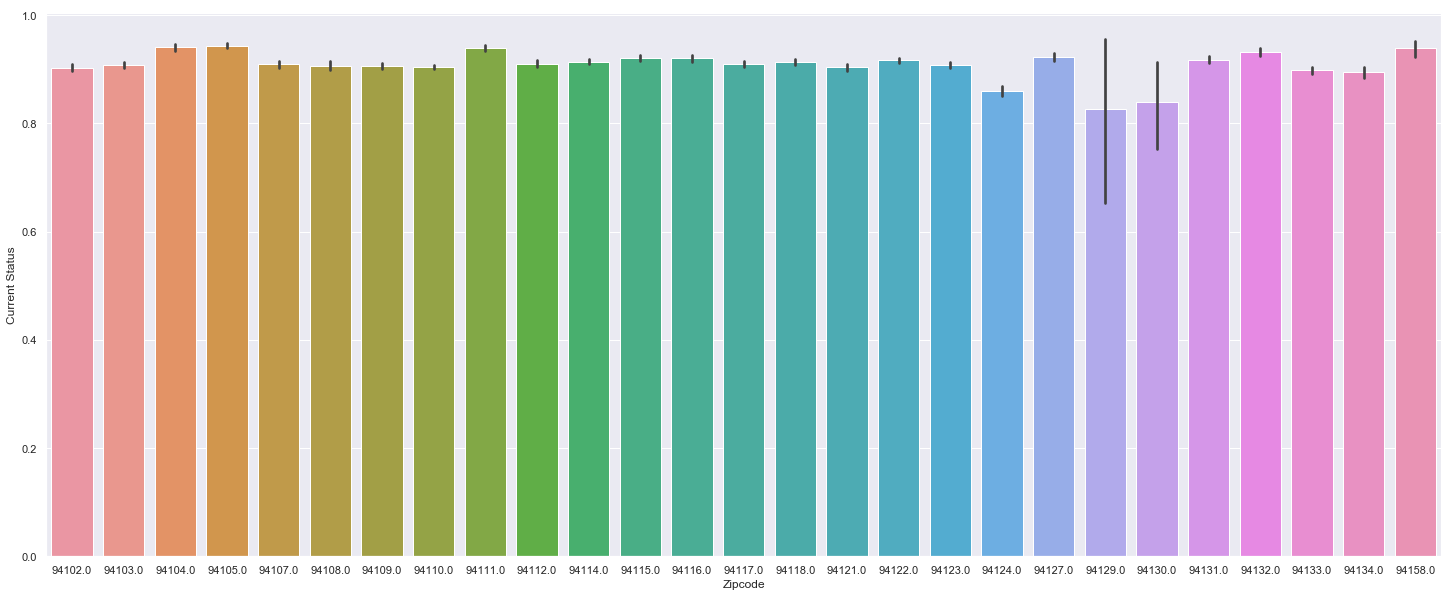

Korrelation zwischen Neighborhoods - Analysis Boundaries  und Current Status ist konnte nicht auf einfache weise berechnet werden, daher wird hierauf verzichtet


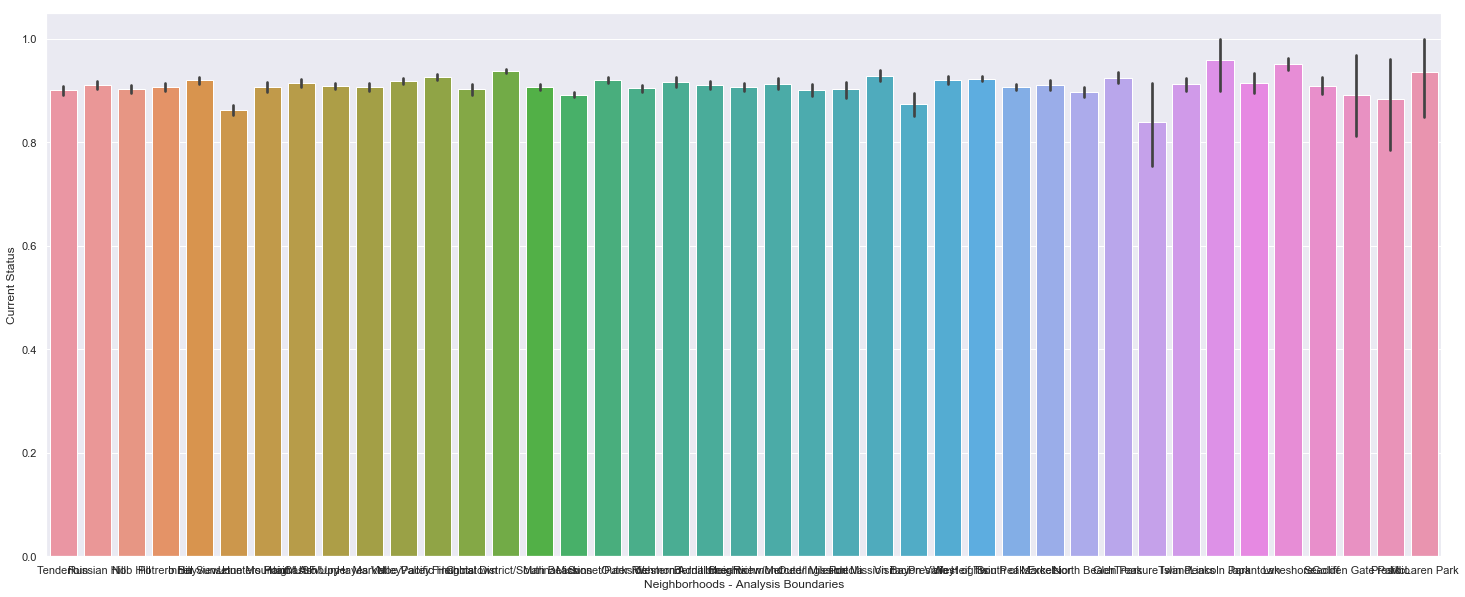

Korrelation zwischen Supervisor District  und Current Status ist  -0.014969


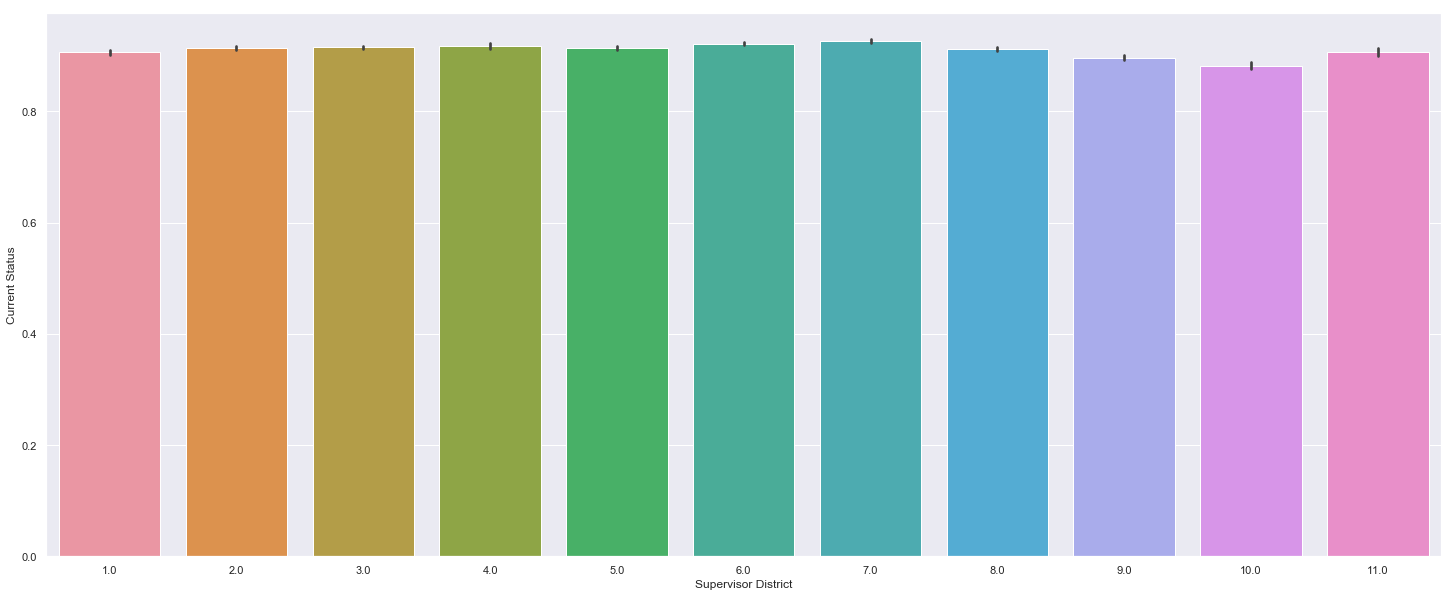

Korrelation zwischen Existing Construction Type  und Current Status ist  -0.017766


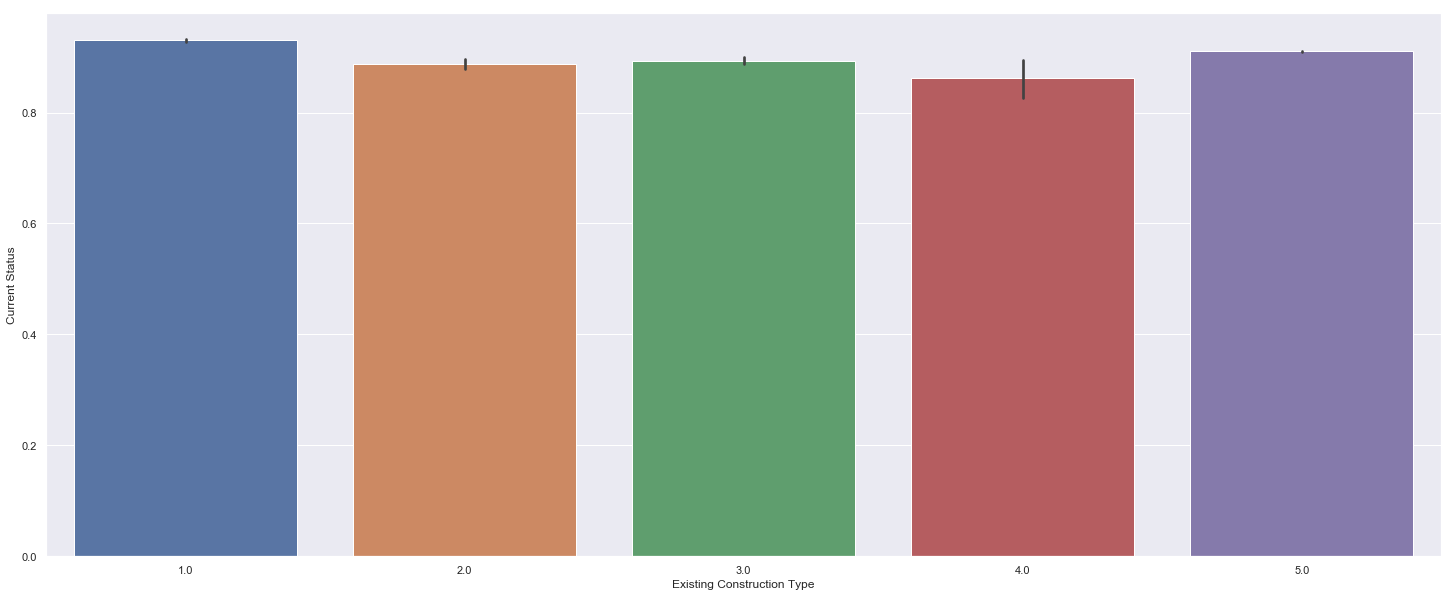

Korrelation zwischen Plansets  und Current Status ist  -0.005025


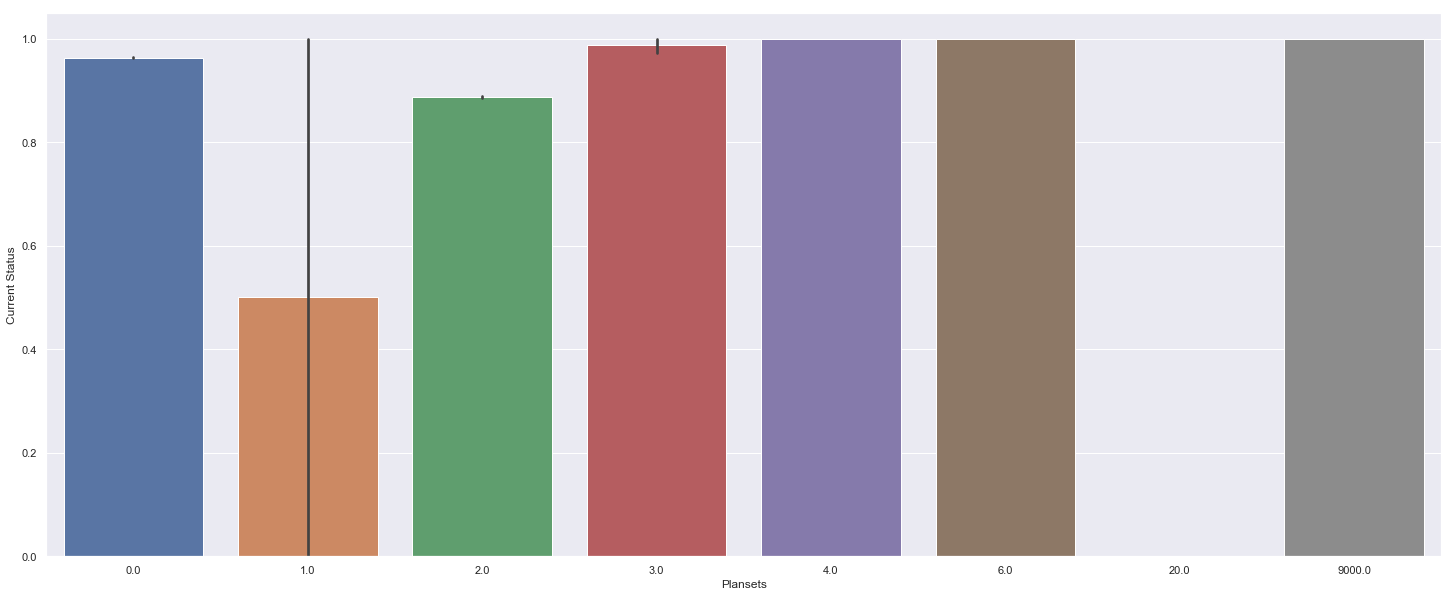

Korrelation zwischen Existing Use  und Current Status ist konnte nicht auf einfache weise berechnet werden, daher wird hierauf verzichtet


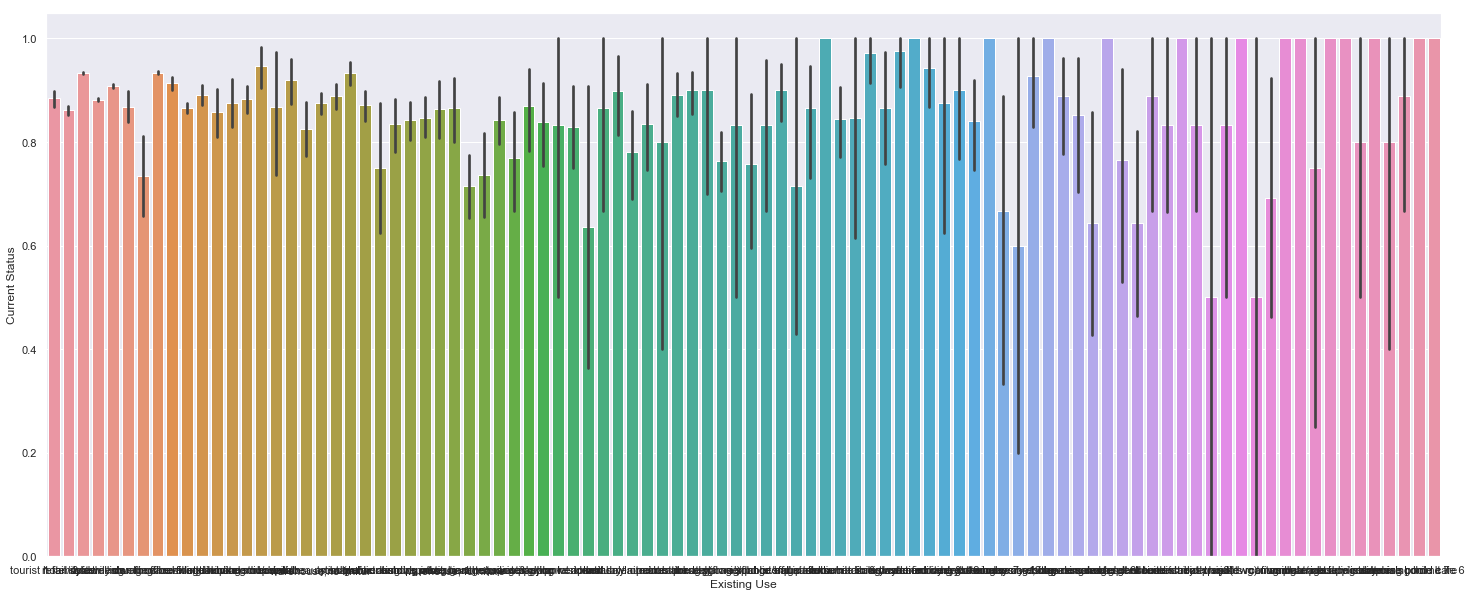

Korrelation zwischen Permit Type  und Current Status ist  0.265189


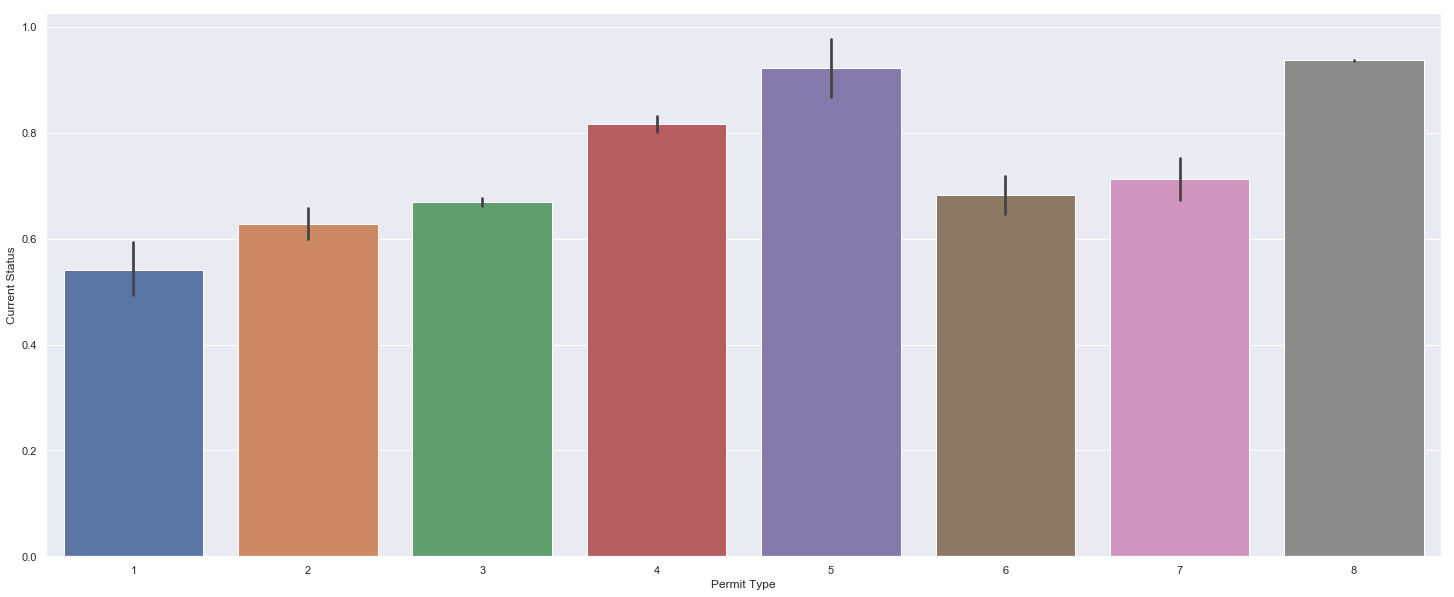

Korrelation zwischen Permit Creation Date Year  und Current Status ist  -0.099547


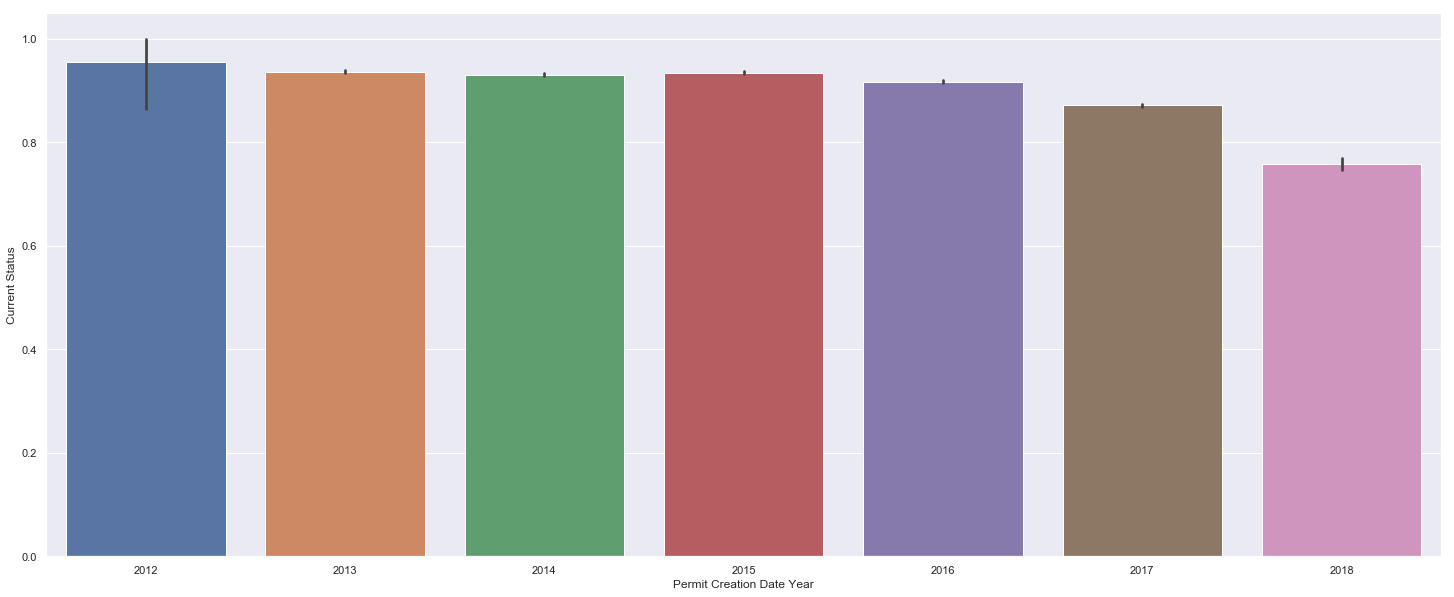

In [39]:
#Spalten bei denen ich einen Zusammenhang zu Current Status vermuten würde
col_cor = [ "Zipcode",
            "Neighborhoods - Analysis Boundaries",
            "Supervisor District",
            "Existing Construction Type",
            "Plansets",
            #"Existing Units",
            "Existing Use",
            #"Revised Cost",
            #"Number of Existing Stories",
            "Permit Type",
            "Permit Creation Date Year"
          ]
for column in col_cor:
    try:
        co = imputed_w_m_dataset[column].corr(imputed_w_m_dataset["Current Status"], method="pearson")
        print("Korrelation zwischen", column ," und Current Status ist ", round(co, 6))
    except (TypeError, KeyError, KeyboardInterrupt) as e:
        print("Korrelation zwischen", column ," und Current Status konnte nicht auf einfache Weise berechnet werden, daher wird hierauf verzichtet")
    barplots(column, "Current Status")

Korrelation zwischen Existing Units  und Current Status ist  0.007452


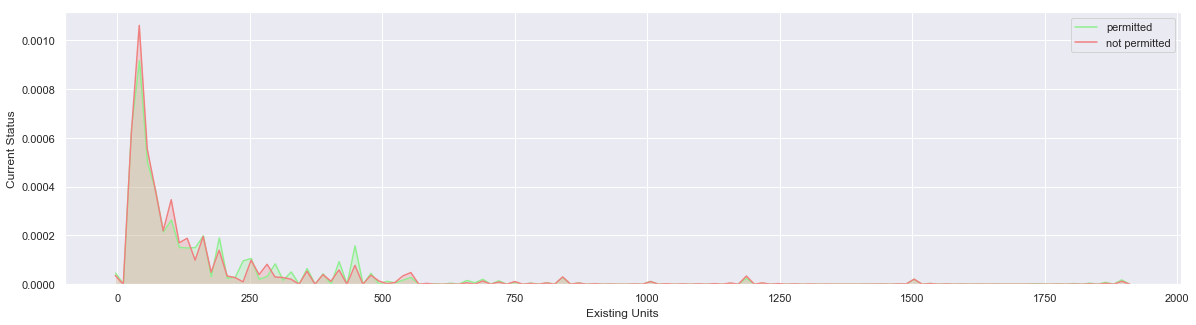

Korrelation zwischen Revised Cost  und Current Status ist  -0.018357


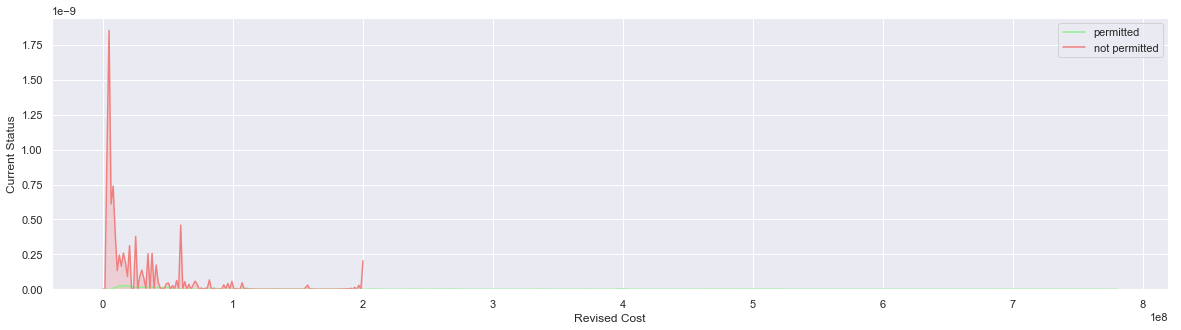

Korrelation zwischen Number of Existing Stories  und Current Status ist  0.046735


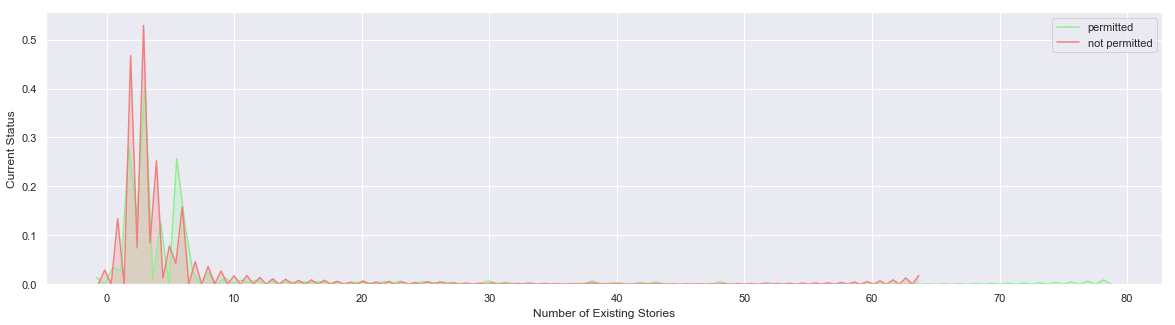

In [40]:
#Spalten bei denen ich einen Zusammenhang zu Current Status vermuten würde
col_cor_num = [ "Existing Units",
                "Revised Cost",
                "Number of Existing Stories"
              ]

    
#da die Barplots nicht wirklich aussagekräfig sind und immer abgebrochen werden mussten haben wir eine andere Darstellungsmethode genommen
for column in col_cor_num:
    try:
        co = imputed_w_m_dataset[column].corr(imputed_w_m_dataset["Current Status"], method="pearson")
        print("Korrelation zwischen", column ," und Current Status ist ", round(co, 6))
    except (TypeError, KeyError) as e:
        print("Korrelation zwischen", column ," und Current Status ist konnte nicht auf einfache weise berechnet werden, daher wird hierauf verzichtet")
    kdeplot(column)

## Einige Schlussfolerungen (Currentstatus)
"permitted" = nach Einteilung oben

Schlussfolgerungen basieren auf den Ergebnissen der Heatmap, Barplots, Graphen und Berechnungen. 

- "Zipcode" und "Current Status":
Zipcode und Current Status korrelieren nicht, wie man anhand der Heatmap sowie der errechneten Korrelation entnehmen kann. Insgesamt sind die Lokationsdaten nicht aussagekräfig, wie man anhand des Barcharts sieht.
- "Neighborhoods - Analysis Boundaries" und "Current Status":
Neighborhoods - Analysis Boundaries ist nicht wirklich aussagekräftig. Man sieht, dass die "permitted" zwischen 80% bis fast 100% schwankt, jedoch lassen sicht keine komplett eindeutigen Schlüsse daraus ziehen.
- "Supervisor District" und "Current Status":
Supervisor District ist nicht wirklich aussagekräfig und scheint kaum Einfluss auf den Current Status zu haben, genauso wie Neighborhoods
- "Existing Construction Type" und "Current Status":
Current Status scheint nicht vom Bautyp abhängig zu sein.
- "Plansets" und "Current Status":
Die Plansets 4,6,9000 wurden am häufigsten "permitted", sie liegen bei 100%. Ebenfalls ist auffällig, dass es bei 1 starke Schwankungen gibt, ob "permitted" wurde oder nicht.
- "Existing Use" und "Current Status":
Das Barchart ist aufgrund der vielen Kategorien von Existing use für uns nicht wirklich aussagekräftig.
- "Permit Type" und "Current Status":
Die Permit Types 4,5,8 sind am häufigsten "permitted", sie liegen über 80%. 
- "Permit Creation Date Year" und "Current Status":
"permitted" nimmt im Laufe der Jahre ab. Dies muss nichts unnatürliches sein, da Anträge, die am Ende der Erstellung des Datensets erstellt wurden noch nicht fertig bearbeitet wurden. (Datensatz wurde aus der offiziellen Datenbank einfach entnommen)
- "Existing Units" und "Current Status":
Existing Units ist nicht aussagekräfig, da "permitted" und "non_permitted" einen ähnlichen Verlauf haben.
- "Revised Cost" und "Current Status":
Es scheint, dass bei niedrigen Kosten die Rate an abgelehnten Anträgen deutlich höher ist.
- "Number of Existing Stories" und "Current Status":
Die meisten Personen stellen Anträge für 2 oder 3 Stockwerke. Es ist jedoch nicht erkenntlich, dass es bei einer bestimmten Stockwerkeanzahl höhere "permitted" Raten gibt.


Wie man anhand der oberen Heatmap, den Barcharts, der Graphen und Berechnungen der Korrelation sehen konnte, besteht so gut wie keine Korrelation zwischen Current Status und den anderen Spalten.

Korrelation zwischen Number of Existing Stories  und Current Status ist  -0.651489


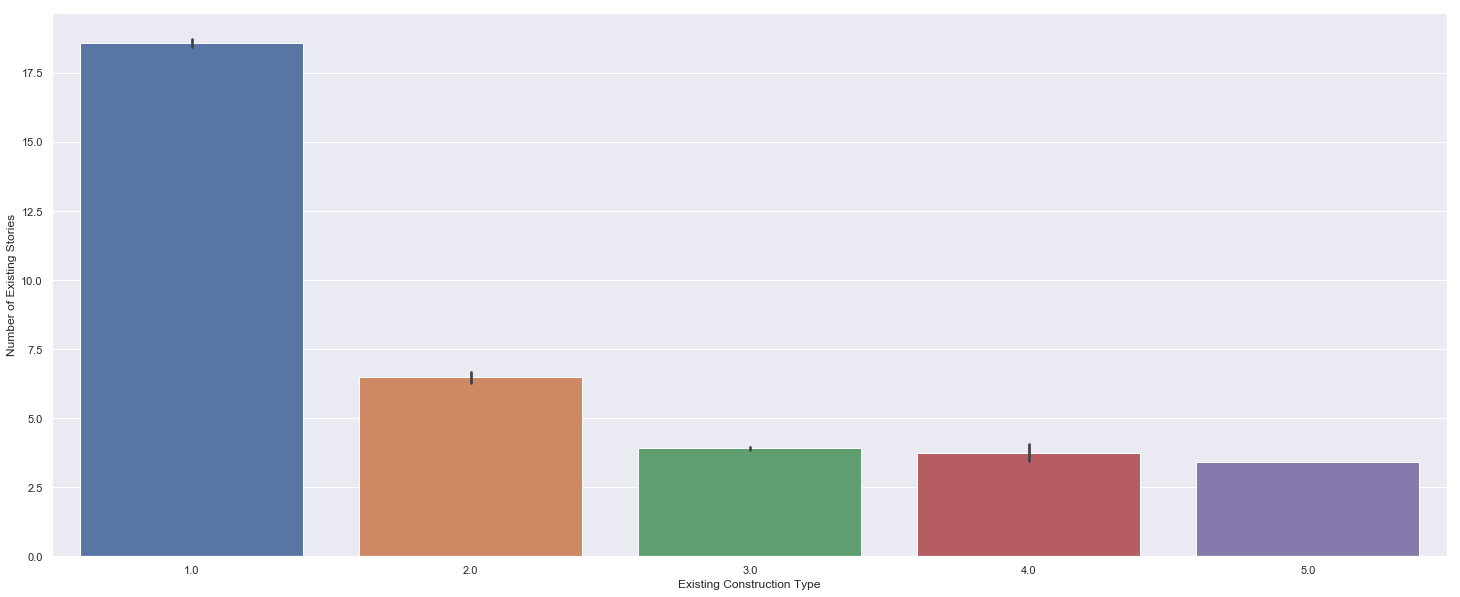

In [41]:
columns = ["Existing Construction Type",
          "Number of Existing Stories"]
try:
    co = imputed_w_m_dataset[columns[0]].corr(imputed_w_m_dataset[columns[1]], method="pearson")
    print("Korrelation zwischen", column ," und Current Status ist ", round(co, 6))
except (TypeError, KeyError) as e:
    print("Korrelation zwischen", columns[0] ," und ", columns[1], " konnte nicht auf einfache weise berechnet werden, daher wird hierauf verzichtet")
barplots(columns[0],columns[1])

Korrelation zwischen Number of Existing Stories  und Current Status ist  -0.305408


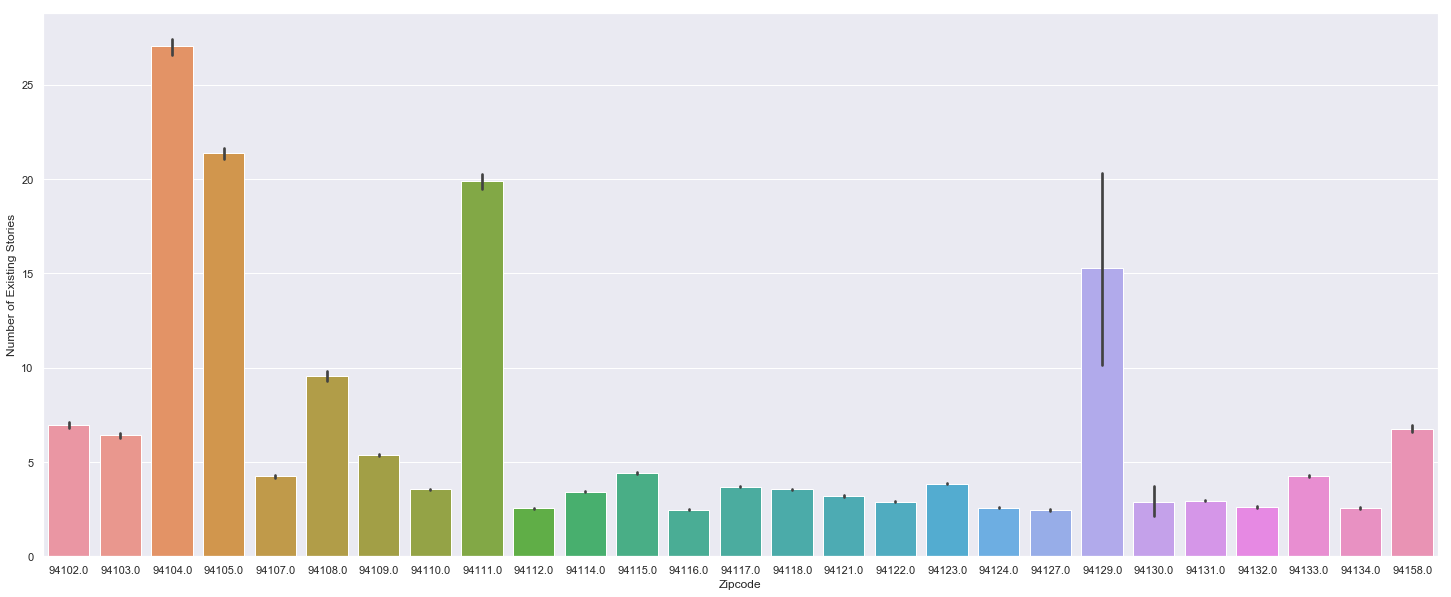

In [42]:
columns = ["Zipcode",
          "Number of Existing Stories"]
try:
    co = imputed_w_m_dataset[columns[0]].corr(imputed_w_m_dataset[columns[1]], method="pearson")
    print("Korrelation zwischen", column ," und Current Status ist ", round(co, 6))
except (TypeError, KeyError) as e:
    print("Korrelation zwischen", columns[0] ," und ", columns[1], " konnte nicht auf einfache weise berechnet werden, daher wird hierauf verzichtet")
barplots(columns[0],columns[1])

Korrelation zwischen Number of Existing Stories  und Current Status ist  0.337339


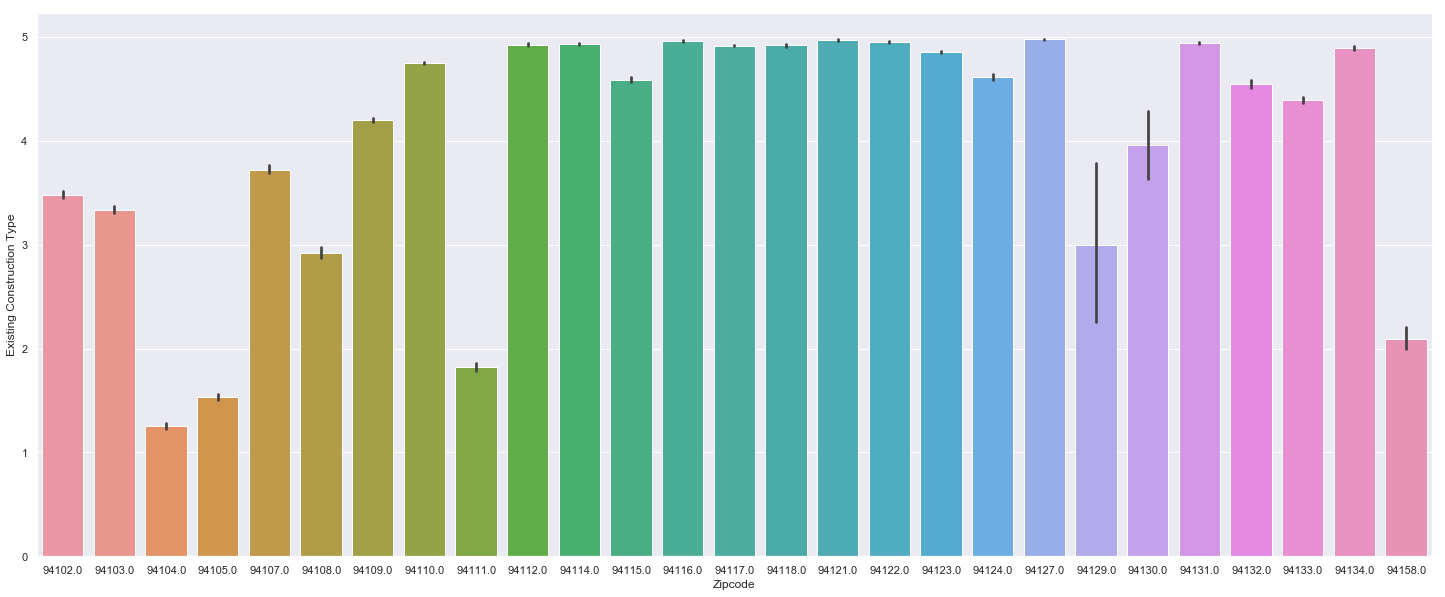

In [43]:
columns = ["Zipcode",
          "Existing Construction Type"]
try:
    co = imputed_w_m_dataset[columns[0]].corr(imputed_w_m_dataset[columns[1]], method="pearson")
    print("Korrelation zwischen", column ," und Current Status ist ", round(co, 6))
except (TypeError, KeyError) as e:
    print("Korrelation zwischen", columns[0] ," und ", columns[1], " konnte nicht auf einfache weise berechnet werden, daher wird hierauf verzichtet")
barplots(columns[0],columns[1])

## Weitere Schlussfolerungen (Allgemein)
"permitted" = nach Einteilung oben

Schlussfolgerungen basieren auf den Ergebnissen der Heatmap, Barplots, Graphen und Berechnungen.

- "Existing Construction Type" und "Number of Existing Stories":
Bei Bautyp 1 werden die meisten Stockwerke gebaut. Danach nehmen die Stockwerke von Typ zu Typ weiter ab. Beschreibung der Typen: 'constr type 3', 'constr type 1', 'wood frame (5)', nan, 'constr type 2', 'constr type 4'
- "Zipcode" und "Number of Existing Stories":
In manchen Zipcodes scheinen besonders hohe Gebäude zu stehen (z.B. In den Zipcodes 94104 und 94015). Dabei muss man jedoch beachten, dass in Zipcode 94129 zum Beispiel nur 30 Gebäude stehen und es somit in diesen Zipcodes möglicherweise weniger Bautypen gibt, die wie zuvor gesehen auch die Anzahl der Stockwerke beeinflussen.
- "Zipcode" und "Existing Construction Type":
Wie wir zuvor festgestellt haben scheinen Construction Type und Number of Existing Stories zu korrelieren. Somit scheint auch in manchen Zipcodes eine vermehrte Anzahl an Construction Types zu geben (z.B. 94104 besonders viele Gebäudetyp 1)

## Probleme mit "Current Status" Spalte (bessere Spalte schon oben erstellt)
```
complete       97077
issued         83559
filed          12043
withdrawn       1754
cancelled       1536
expired         1370
approved         733
reinstated       563
suspend          193
revoked           50
plancheck         16
appeal             2
incomplete         2
disapproved        2
```

Wie man sehen kann enthält Current Status 14 verschiedene Kategorien, die unterschiedlich groß sind. Da die Verteilung offensichtlich nicht gleich ist, kann es bei einer Prediction zu Schwierigkeiten kommen, die kleinen Kategorien überhaupt mal vorherzusagen.

Daher haben wir uns dazu entschieden Current Status in "permitted" und "non_permitted" einzuteilen um einerseits die Verteilung der Werte auszugleichen und andererseits bessere Werte für unsere Graphen und Korrelation zu erreichen. In unserer neuen Spalte hatten wir dann für 'approved', 'issued', 'complete' eine 1 und den Rest eine 0. Diese Werte sind deutlich besser. Wenn wir dabei 14 Kategorien gehabt hätten wäre es nochmal deutlich schwieriger geworden die Graphen zu bauen und die richtigen Schlussfolgerungen aus ihnen zu ziehen. Das selbe gilt auch für Predictions. 

# Aufgabe C SF Permits Prediction

- Predict the "Current Status" or your substitute column from B from the other columns. - Drop unessecary columns - Construct one-hot encoded dummy columns - Choose the Predictor of your choice

In [44]:
imputed_w_m_h_dataset = imputed_w_m_dataset.copy()

## Weitere Spalten droppen

In B haben wir schon die "was_missing" Spalten gedroppt. Dazu sind "Existing Units", "Revised Cost" und "Number of Existing Stories" schon kategorisiert und können vom one-hot enconding entnommen werden

In [45]:
onehot_dataset = imputed_w_m_h_dataset.drop([ "Existing Units", 
                                             "Revised Cost",
                                             "Number of Existing Stories",
                                            "Current Status"], axis=1)

Testen ob noch Spalten vorhanden sind, die besonders viele unterschiedliche Werte haben und damit schwer zu kategorisieren sind.

In [46]:
most_values = []
for column in onehot_dataset:
    in_val = (column, len(onehot_dataset[column].unique()))
    most_values.append(in_val)
most_values.sort(key=lambda tup: tup[1])
for column, i in most_values:
    print(column, i)

Voluntary Soft-Story Retrofit 2
Fire Only Permit 2
Site Permit 2
Existing Construction Type 5
Filed Date Year 6
Issued Date Year 6
First Construction Document Date Year 6
Permit Creation Date Year 7
Current Status Date Year 7
Permit Type 8
Plansets 8
Supervisor District 11
Permit Expiration Date Year 12
Permit Expiration Date Month 12
Permit Creation Date Month 12
Current Status Date Month 12
Filed Date Month 12
Issued Date Month 12
First Construction Document Date Month 12
Zipcode 27
Permit Expiration Date Day 31
Permit Creation Date Day 31
Current Status Date Day 31
Filed Date Day 31
Issued Date Day 31
First Construction Document Date Day 31
Neighborhoods - Analysis Boundaries 41
Existing Use 94
Street Name 1704


Street Name scheint besonders viele unterschiedliche Werte zu haben. Daher testen wir one-hot encoding mit und ohne Street Name.

In [47]:
imputed_w_m_h_dataset = pd.get_dummies(data=imputed_w_m_h_dataset, columns=onehot_dataset.columns)
imputed_w_m_h_dataset.shape

(198900, 2210)

In [48]:
imputed_w_m_h_dataset = imputed_w_m_dataset.copy()
onehot_dataset = imputed_w_m_h_dataset.drop([ "Existing Units", 
                                             "Revised Cost",
                                             "Number of Existing Stories",
                                            "Current Status"], axis=1)
imputed_w_m_h_dataset = imputed_w_m_h_dataset.drop("Street Name", axis=1)
onehot_dataset = onehot_dataset.drop("Street Name", axis=1)

In [49]:
#Convert categorical variable into dummy/indicator variables
imputed_w_m_h_dataset = pd.get_dummies(data=imputed_w_m_h_dataset, columns=onehot_dataset.columns)
imputed_w_m_h_dataset.shape

(198900, 506)

Street Name sorgt für weitere 1704 Spalten!

## Predicting Current Status

Zuerst trennen wir unsere Target Spalte ("Current Status") von den übrigen

In [50]:
target = imputed_w_m_h_dataset["Current Status"]
non_target = imputed_w_m_h_dataset.drop("Current Status", axis=1)
print(target.shape, non_target.shape)

(198900,) (198900, 505)


In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(non_target, target, test_size=0.3)

StandardScaler entfernt den Mittelwert und skaliert die Daten auf die Einheitenabweichung. 

Der Normalizer skaliert den Vektor für jede Probe neu, um unabhängig von der Verteilung der Proben eine Einheitsnorm zu erhalten.

In [52]:
non_target_scaled = StandardScaler().fit_transform(non_target)

non_target_normalized = Normalizer().fit_transform(non_target)

C:\Users\D073622\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\D073622\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [53]:
def logReg(solver_mode):
    #n_jobs für alle solver außer liblinear
    lr = LogisticRegression(solver=solver_mode, max_iter=1000, n_jobs=-1).fit(X_train, Y_train)
    #print("Score: ", lr.score(digits_train_sample, labels_train_sample))
    logReg_result = lr.predict(X_test)
    print("Accuracy Score für Logistic Regression mit Solver=", solver_mode ," ist:", accuracy_score(logReg_result, Y_test))
    return logReg_result

In [54]:
def linReg():
    linreg = LinearRegression().fit(X_train, Y_train)
    linreg_result = linreg.predict(X_test)
    print("Accuracy Score für Lineare Regression ist:", accuracy_score(linreg_result, Y_test))
    return linreg_result

## Prediction mit Logistic Regression, Linear Support Vektor Classifikation und SelectKBest

In [55]:
logReg_result = logReg("saga")
logReg_result = logReg("lbfgs")
logReg_result = logReg("liblinear")
logReg_result = logReg("newton-cg")

Accuracy Score für Logistic Regression mit Solver= saga  ist: 0.9099882688117982
Accuracy Score für Logistic Regression mit Solver= lbfgs  ist: 0.9099547511312217


C:\Users\D073622\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Accuracy Score für Logistic Regression mit Solver= liblinear  ist: 0.9096530920060332
Accuracy Score für Logistic Regression mit Solver= newton-cg  ist: 0.9795709736886208


In [56]:
svc = LinearSVC().fit(X_train, Y_train)
svc_result = svc.predict(X_test)

kb = SelectKBest(k=30).fit(X_train, Y_train)
X_transform_train = kb.transform(X_train)
X_transform_test = kb.transform(X_test)

svc.fit(X_transform_train, Y_train)
svc_kb_result = svc.predict(X_transform_test)

print("Accuracy Score für LinearSVC ohne KBest: ", accuracy_score(svc_result, Y_test))
print("Accuracy Score für LinearSVC mit KBest k =30: ", accuracy_score(svc_kb_result, Y_test))

C:\Users\D073622\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\D073622\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 32  67  73  74 115 314] are constant.
  UserWarning)
C:\Users\D073622\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Accuracy Score für LinearSVC ohne KBest:  0.965225406401877
Accuracy Score für LinearSVC mit KBest k =30:  0.9760516172280879


## Prediction mit Linearer Regrssion und Support Vektor Regression

In [ ]:
#linreg_result = linReg()
#wegen zu langer Rechenzeit weggelassen. Und Colab konnte nicht genutzt werden (siehe Aufgabe D)
clf = svm.SVR()
clf.fit(X_train, Y_train)
clf_result = clf.predict(X_test)

clf.fit(X_transform_train, Y_train)
clf_kb_result = svc.predict(X_transform_test)

print("Accuracy Score für SV Regression ohne KBest: ", accuracy_score(clf_result, Y_test))
print("Accuracy Score für SV Regression mit KBest: ", accuracy_score(clf_kb_result, Y_test))

Accuracy Score: In der Multilabel-Klassifizierung berechnet diese Funktion die Genauigkeit der Teilmengen.

Wir haben Logistic Regression sowie Lineare Support Vektor Classifikation jeweils mit SelectKBest und ohne. Um das "beste" Modell zu finden haben wir verschiedene Solver getestet und im Internet recherchiert. Ebenfalls haben wir SelectKBest genutzt, da durch die vielen Spalten das Modell ungenau werden könnte. SelectKBest wählt sich Merkmale nach den k höchsten Punktzahlen aus.

Wir konnten feststellen, dass mit Logistic Regression die meisten Solver eine Genauigkeit von 91% erreichen konnten. Newton-cg konnte sich hier hervorheben und erreichte einen Accuracy Score von 97%, also nochmals deutlich höher als die restlichen Solver.

Dann haben wir Lineare Support Vektor Classifikation angewendet, einmal mit SelectKBest und einmal ohne. Hier erreichten wir Werte von 96% und 97%. 

# Aufgabe D SF Challenges

Describe challenges you faced during A, B and C and how you solved it.

Da die Aufgaben ineinander übergingen haben wir die Probleme nicht voneinander getrennt, sondern in einem Fluss aufgeschrieben wie wir sie wahrgenommen haben. (z.b. Colab)


Es hat damit begonnen, dass wir eigentlich in Google Colab entwickeln wollten, da dort die Umgebung moderner, schneller und mehr Funktionen hat. Es war jedoch schwierig das Datenset (das CSV File) in Google Colab einzubinden. Eine einfache Einbindung wie im lokalen Notebook war nicht möglich. Lösung: Wir haben uns entschieden im lokalen Jupiter Notebook zu entwickeln, da wir schnell festgestellt haben, dass die meisten Funktionen auch dort vorhanden waren und der Umstieg weniger Zeit beansprucht hat als Methoden zu finden, das Datenset in Google Colab einzubinden. Somit hat sich das Problem "aufgelöst".

Unser nächstes Problem kam beim Datenset auf und dessen Bedeutung. Wir hatten keinerlei Vorerfahrung im Bereich Baugenehmigungen. Lösung: Es blieb nichts anderes übrig als sich über das Thema selbst ein bisschen zu informieren. Woher stammen die Daten? Was bilden die Daten ab? Aus welchem Jahr sind die Daten? Und viele weitere Fragen haben wir geklärt. Dabei sind wir auf Kaggle auf den Background Bereich aufmerksam geworden, der uns weitere Informationen liefern konnte. Von dort aus konnten wir uns alle weiteren Fragen ergooglen und zusammensuchen.

Das nächste Problem hatten wir mit dem Datenset. Wir hatten alle noch nicht mit einem so großen Datenset gearbeitet, weswegen das Übersicht verschaffen zu Beginn Probleme machte. 43 Spalten und 200.000 Zeilen machen es einem nicht so einfach. Ebenfalls waren die Spalten für unser Verständnis nicht immer eindeutig und verständlich. Lösung: Mit dem DataDictionaryBuildPermit.xlsx, sowie beim Betrachten der Spalteninhalte haben wir uns mit dem zuvor erworbenen Verständnis über Building Permits einen Überblick über den Datensatz verschafft und die für uns wichtigen Spalten verstanden.

Bis hierhin, haben wir festgestellt, wäre es hilfreich gewesen mit einer Person sprechen zu können, die sich in diesem Thema auskennt. Im besten Fall ein(e) Sachbearbeiter(in), der/die sich um Gebäudegenehmigungen kümmert. Das war auch eines unserer Learnings für die Zukunft. Wenn wir an einem ML Szenario (oder auch anderen Aufgaben, in denen wir nicht vom Fach sind) arbeiten ist es notwendig, mit Leuten vom Fach zu sprechen oder sich selbst ein tiefes Verständnis zu erwerben. Ansonsten können nicht "perfekte" Ergebnisse erzielt werden, die eigentlich von jedem angestrebt werden sollten.

Beim Cleaning haben wir festgestellt, dass manche Spalten Y und nan Werte enthalten. Mangelnde Kenntnisse waren hier das Problem. Lösung: Wir haben die nan Werte durch N ersetzt, somit nan als N interpretiert. Dieser Ansatz hat sich auch nicht als falsch erwiesen. 

Beim Konstruieren der Current Status Spalte hatten wir das Problem, dass wir uns nicht sicher waren, in wie weit wir vereinfachen können. Lösung: Da wir nicht genug Zeit hatten, haben wir eine Klassifizierung vorgenommen, welche die Heatmap / den Plotting Prozess vereinfacht und für uns das Interpretieren vereinfacht.

Noch ein Problem ist uns beim Barplotting aufgefallen. Sobald viele Klassen vorhanden waren, waren die Graphen nicht mehr eindeutig für uns lesbar. Lösung: Somit mussten wir uns auf Spalten begrenzen, die in der Heatmap vielversprechend aussahen und bei denen wir eine Korrelation vermuteten.

Und zu guter letzt noch ein Problem, dass sich über alle Aufgaben erstreckt hat. Problem: Überblick behalten und schauen, dass nicht eine Teilaufgabe vergessen wurde. Lösung: Wir haben das Notebook auf eine für uns sinnvolle Art strukturiert und immer eine Art Safepoints eingebaut. Also für jede Aufgabe ein Datenset .copy() gemacht um nicht das Notebook komplett durchlaufen lassen zu müssen. Ebenfalls haben wir viel mit Markdown gearbeitet und die Aufgaben direkt im Code beantwortet um nicht wegen der Länge des Notebooks Teile zu vergessen.
